**Importing all needed libraries, I will use mostly Tensorflow**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, Input, AveragePooling2D, Activation, MaxPooling2D, BatchNormalization, Concatenate
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10

**Pandas for displaying graph representations of loss and accuracy **

In [ ]:
import pandas as pd

getting dataset 


In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [ ]:
print('Shape of x_train is {}'.format(x_train.shape))
print('Shape of x_test is {}'.format(x_test.shape)) 
print('Shape of y_train is {}'.format(y_train.shape))
print('Shape of y_test is {}'.format(y_test.shape))

Shape of x_train is (50000, 32, 32, 3)
Shape of x_test is (10000, 32, 32, 3)
Shape of y_train is (50000, 1)
Shape of y_test is (10000, 1)


***Normalizing the dataset, scaling 0-1***

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)        

**base model which is made by 2 basic CNN layer (32 filters) with maxpooling.** After that passed to Flatten and Dense. Compiled using adam optimizer.

In [ ]:
model = Sequential() 

model.add(Conv2D(filters=32, kernel_size=(4, 4), input_shape=(32, 32, 3), activation='relu'))  
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=(4, 4), input_shape=(32, 32, 3), activation='relu'))  
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_17 (Conv2D)          (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 800)               0         
                                                                 
 dense_7 (Dense)             (None, 256)              

In [ ]:
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
1563/1563 [==============================] - 9s 5ms/step - loss: 1.4909 - accuracy: 0.4628 - val_loss: 1.2347 - val_accuracy: 0.5636
Epoch 2/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1554 - accuracy: 0.5927 - val_loss: 1.1512 - val_accuracy: 0.6000
Epoch 3/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0027 - accuracy: 0.6498 - val_loss: 1.0320 - val_accuracy: 0.6380
Epoch 4/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8927 - accuracy: 0.6890 - val_loss: 0.9997 - val_accuracy: 0.6564
Epoch 5/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8000 - accuracy: 0.7210 - val_loss: 0.9593 - val_accuracy: 0.6671
Epoch 6/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7223 - accuracy: 0.7476 - val_loss: 0.9404 - val_accuracy: 0.6799
Epoch 7/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6518 - accuracy: 0.7717 - val_loss: 0.9790 - val_accuracy:

In [ ]:
evaluation = model.evaluate(x_test, y_test)
print(evaluation)

313/313 [==============================] - 1s 3ms/step - loss: 4.0664 - accuracy: 0.6395
[4.066357612609863, 0.6395000219345093]


<Axes: >

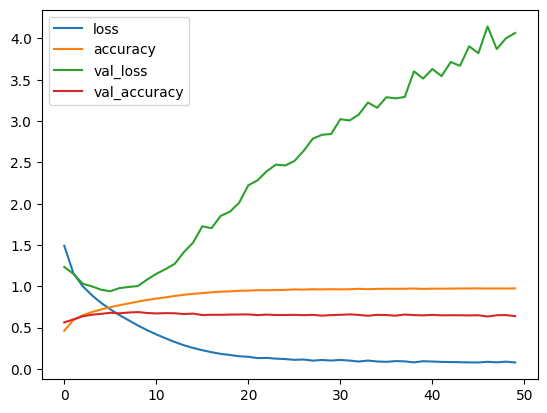

In [ ]:
pd.DataFrame(history.history).plot()

**as we can see test accuracy (val_accuracy) is 63% and it didn't made big change within 50 iterations so we need to make better model. Validation loss increasing actively that means model is overfitting and we have to regularize model with Dropout()**

**Adding Dropout after each maxpooling**

In [ ]:
model2 = Sequential() 

model2.add(Conv2D(filters=32, kernel_size=(4, 4), input_shape=(32, 32, 3), activation='relu'))  
model2.add(MaxPool2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(filters=32, kernel_size=(4, 4), input_shape=(32, 32, 3), activation='relu'))  
model2.add(MaxPool2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Flatten())
model2.add(Dense(256, activation='relu'))
model2.add(Dense(10, activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history2 = model2.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
1563/1563 [==============================] - 10s 5ms/step - loss: 1.5438 - accuracy: 0.4393 - val_loss: 1.2626 - val_accuracy: 0.5514
Epoch 2/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2423 - accuracy: 0.5597 - val_loss: 1.1289 - val_accuracy: 0.6067
Epoch 3/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1213 - accuracy: 0.6041 - val_loss: 1.0342 - val_accuracy: 0.6329
Epoch 4/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0340 - accuracy: 0.6382 - val_loss: 0.9557 - val_accuracy: 0.6744
Epoch 5/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9604 - accuracy: 0.6632 - val_loss: 0.9318 - val_accuracy: 0.6764
Epoch 6/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9059 - accuracy: 0.6830 - val_loss: 0.9122 - val_accuracy: 0.6785
Epoch 7/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8569 - accuracy: 0.7011 - val_loss: 0.8871 - val_accuracy

In [ ]:
evaluation2 = model2.evaluate(x_test, y_test)
print(evaluation2)

313/313 [==============================] - 1s 4ms/step - loss: 1.0041 - accuracy: 0.7114
[1.0041296482086182, 0.7113999724388123]


<Axes: >

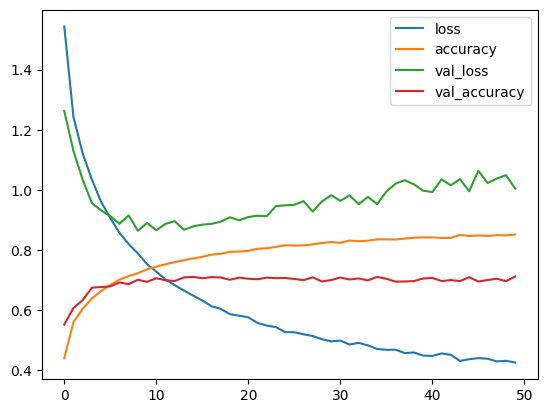

In [ ]:
pd.DataFrame(history2.history).plot()

So Dropout() helped us to increase until 71%

**now we are adding one more layer to each existing layers with more filters**

In [ ]:
model3 = Sequential()
model3.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model3.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model3.add(MaxPool2D(2, 2))
model3.add(Dropout(0.4))

model3.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model3.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model3.add(MaxPool2D(2, 2))
model3.add(Dropout(0.4))

model3.add(Flatten())

model3.add(Dense(units=1024, activation='relu'))
model3.add(Dense(units=1024, activation='relu'))

model3.add(Dense(units=10, activation='softmax'))

model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



In [ ]:
# history3 = model3.fit(x_train, y_train, epochs=25, validation_data=(x_test, y_test))
history3 = model3.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test))


Epoch 1/50
1563/1563 [==============================] - 17s 9ms/step - loss: 1.6072 - accuracy: 0.4031 - val_loss: 1.2911 - val_accuracy: 0.5396
Epoch 2/50
1563/1563 [==============================] - 13s 9ms/step - loss: 1.2214 - accuracy: 0.5599 - val_loss: 1.0648 - val_accuracy: 0.6263
Epoch 3/50
1563/1563 [==============================] - 13s 9ms/step - loss: 1.0569 - accuracy: 0.6238 - val_loss: 0.9852 - val_accuracy: 0.6490
Epoch 4/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.9490 - accuracy: 0.6658 - val_loss: 0.8335 - val_accuracy: 0.7079
Epoch 5/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.8628 - accuracy: 0.6958 - val_loss: 0.8375 - val_accuracy: 0.7081
Epoch 6/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.8050 - accuracy: 0.7125 - val_loss: 0.7611 - val_accuracy: 0.7368
Epoch 7/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.7555 - accuracy: 0.7327 - val_loss: 0.7526 - val_ac

In [ ]:
evaluation3 = model3.evaluate(x_test, y_test)
print(evaluation3)

313/313 [==============================] - 1s 4ms/step - loss: 1.0137 - accuracy: 0.7529
[1.0137403011322021, 0.7529000043869019]


<Axes: >

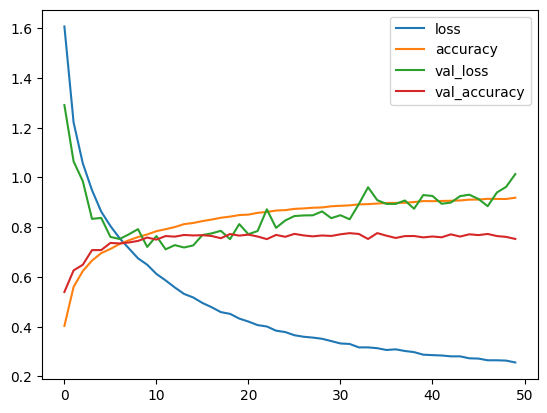

In [ ]:
pd.DataFrame(history3.history).plot()

**now we decreased significantly the val_loss and accuray become 75% which is enough better trained than 1st model**. Also Dropout(0.4) helped us to regularization better than 0.25

adding 1 more layer with filters *and* filters + dropouts like 0.2 0.3 0.4 0.5

In [ ]:
model4 = Sequential()


model4.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model4.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model4.add(MaxPool2D((2, 2)))
model4.add(Dropout(0.2))


model4.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model4.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model4.add(MaxPool2D((2, 2)))
model4.add(Dropout(0.3))


model4.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model4.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model4.add(MaxPool2D((2, 2)))
model4.add(Dropout(0.4))


model4.add(Flatten())

model4.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))

model4.add(Dropout(0.5))

model4.add(Dense(10, activation='softmax'))

model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [ ]:
history4 = model4.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test))


Epoch 1/50
1563/1563 [==============================] - 14s 7ms/step - loss: 1.7134 - accuracy: 0.3620 - val_loss: 1.2754 - val_accuracy: 0.5435
Epoch 2/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.2854 - accuracy: 0.5378 - val_loss: 1.0618 - val_accuracy: 0.6082
Epoch 3/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1071 - accuracy: 0.6106 - val_loss: 0.9176 - val_accuracy: 0.6788
Epoch 4/50
1563/1563 [==============================] - 10s 7ms/step - loss: 1.0174 - accuracy: 0.6451 - val_loss: 0.8950 - val_accuracy: 0.6857
Epoch 5/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9338 - accuracy: 0.6768 - val_loss: 0.8061 - val_accuracy: 0.7139
Epoch 6/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8809 - accuracy: 0.6948 - val_loss: 0.7834 - val_accuracy: 0.7288
Epoch 7/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8465 - accuracy: 0.7098 - val_loss: 0.7404 - val_ac

In [ ]:
evaluation4 = model4.evaluate(x_test, y_test)
print(evaluation4)

313/313 [==============================] - 1s 3ms/step - loss: 0.6374 - accuracy: 0.7971
[0.6373924016952515, 0.7971000075340271]


<Axes: >

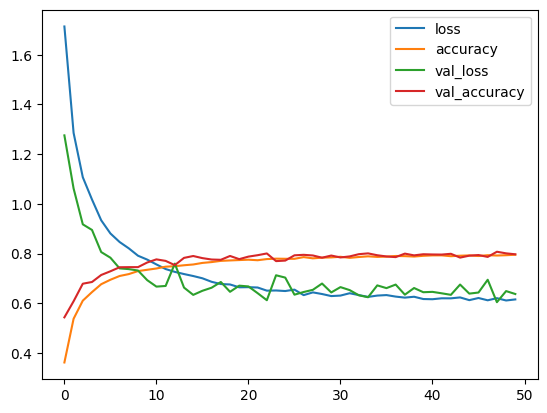

In [ ]:
pd.DataFrame(history4.history).plot()


# **that's the better model with lower loss and with high accuracy (+4%), but as i have seen from hints form cifar2_homework.ipybn i need to add normalization**

**Adding Batch Normalization before maxpooling**


In [ ]:
model5 = Sequential()

model5.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model5.add(BatchNormalization())

model5.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model5.add(BatchNormalization())

model5.add(MaxPool2D((2, 2)))
model5.add(Dropout(0.2))

model5.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model5.add(BatchNormalization())

model5.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model5.add(BatchNormalization())

model5.add(MaxPool2D((2, 2)))
model5.add(Dropout(0.3))

model5.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model5.add(BatchNormalization())

model5.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model5.add(BatchNormalization())

model5.add(MaxPool2D((2, 2)))
model5.add(Dropout(0.4))

model5.add(Flatten())

model5.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))

model5.add(BatchNormalization())
model5.add(Dropout(0.5))

model5.add(Dense(10, activation='softmax'))

In [ ]:
model5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history5=model5.fit(x_train,y_train,epochs=50,validation_data=(x_test,y_test))

Epoch 1/50
1563/1563 [==============================] - 30s 10ms/step - loss: 1.5771 - accuracy: 0.4538 - val_loss: 1.0693 - val_accuracy: 0.6223
Epoch 2/50
1563/1563 [==============================] - 14s 9ms/step - loss: 1.0640 - accuracy: 0.6250 - val_loss: 0.9197 - val_accuracy: 0.6719
Epoch 3/50
1563/1563 [==============================] - 14s 9ms/step - loss: 0.8984 - accuracy: 0.6900 - val_loss: 0.7881 - val_accuracy: 0.7289
Epoch 4/50
1563/1563 [==============================] - 14s 9ms/step - loss: 0.7912 - accuracy: 0.7257 - val_loss: 0.7204 - val_accuracy: 0.7501
Epoch 5/50
1563/1563 [==============================] - 14s 9ms/step - loss: 0.7229 - accuracy: 0.7531 - val_loss: 0.6310 - val_accuracy: 0.7808
Epoch 6/50
1563/1563 [==============================] - 15s 9ms/step - loss: 0.6585 - accuracy: 0.7739 - val_loss: 0.6178 - val_accuracy: 0.7875
Epoch 7/50
1563/1563 [==============================] - 14s 9ms/step - loss: 0.6170 - accuracy: 0.7905 - val_loss: 0.5398 - val_a

In [ ]:
evaluation5 = model5.evaluate(x_test, y_test)
print(evaluation5)

313/313 [==============================] - 1s 4ms/step - loss: 0.4436 - accuracy: 0.8706
[0.4436120092868805, 0.8705999851226807]


<Axes: >

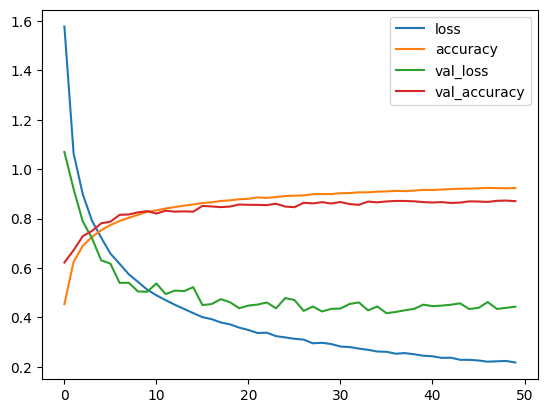

In [ ]:
pd.DataFrame(history5.history).plot()

now we got 87% accuracy.

**what did i learn from that training, that Dropout and BatchNormalization made huge affect to model in architecture ** But couldnt include/understand augmentation. Finally we have 80+ accuracy
